# <p align="center">Hotel Customer Segmentation</p>

---

## <p align="center">*2 - Clustering*</p>

---

### 👥 **Team Members**
- **Ana Farinha** *(Student Number: 20211514)*  
- **António Oliveira** *(Student Number: 20211595)*  
- **Mariana Neto** *(Student Number: 20211527)*  
- **Salvador Domingues** *(Student Number: 20240597)*  

📅 **Date:** *March 10, 2025*  
📍 **Prepared for:** *Hotel H*  

---

# ToC

<a class="anchor" id="top"></a>


1. [Import Libraries & Data](#1.-Import-Libraries-&-Data) <br><br>

2. ["Regular" Clustering](#2.-"Regular"-Clustering)<br>
    
    2.1 [K-Means](#2.1-K-Means) <br>
    
    2.2 [DBSCAN](#2.2-DBSCAN) <br><br>
    
3. [Clustering with Dimensionality Reduction](#3.-Clustering-with-Dimensionality-Reduction)<br>

    3.1 [Principal Components Analysis](#3.1-Principal-Components-Analysis) <br>
    
    3.2 [K-Means](#3.2-K-Means) <br>
    
    3.3 [DBSCAN](#3.3-DBSCAN) <br><br>
    
4. [Cluster Evaluation](#4.-Cluster-Evaluation)<br><br>
    
5. [Outliers' Reintroduction](#5.-Outliers'-Reintroduction)<br>


<a href="#top">Top &#129033;</a>

# 1. Import Libraries & Data

In [10]:
import pandas as pd
import numpy as np

# Clustering Algorithms
from sklearn.cluster import DBSCAN, MeanShift, KMeans, \
    AgglomerativeClustering, estimate_bandwidth
from sklearn.decomposition import PCA
import umap.umap_ as umap
from sklearn.neighbors import NearestNeighbors

# Scaling
from sklearn.preprocessing import MinMaxScaler

# Visualisations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import InterclusterDistance
from yellowbrick.cluster import SilhouetteVisualizer
from matplotlib import ticker

# Predictions
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report

# External Functions File
import functions as f

pd.set_option('display.max_columns', None)

# Suppress Warnings
import warnings
warnings.filterwarnings("ignore")

**Data**

In [11]:
df = pd.read_csv('./treated_data.csv', index_col = 'Unnamed: 0')
df

Age  DaysSinceCreation  AverageLeadTime  LodgingRevenue  \
0       60.0              480.0             64.0           495.0   
1       54.0             1197.0             14.0           695.0   
4       53.0              755.0             56.0           165.0   
6       33.0              673.0              2.0           237.0   
7       31.0               94.0            179.0           168.0   
...      ...                ...              ...             ...   
107621  22.0              159.0             69.0           212.0   
107622  54.0              209.0             83.0           256.5   
107624  41.0              783.0             58.0           218.0   
107625  19.0               46.0             89.0           911.7   
107627  60.0               55.0            176.0           730.8   

        OtherRevenue  BookingsCanceled  BookingsNoShowed  BookingsCheckedIn  \
0              162.0               0.0               0.0                2.0   
1              100.0               0.0               0.0                1.0   
4               12.0               0.0               0.0                1.0   
6               71.6               0.0               0.0                1.0   
7               66.0               0.0               0.0                1.0   
...              ...               ...               ...                ...   
107621          32.0               0.0               0.0                1.0   
107622          74.4               0.0               0.0                1.0   
107624          14.0               0.0               0.0                1.0   
107625          31.0               0.0               0.0                1.0   
107627          96.0               0.0               0.0                1.0   

        PersonsNights  RoomNights  SRHighFloor  SRCrib  SRKingSizeBed  \
0                 6.0         3.0            0       0              1   
1                10.0         5.0            1       0              1   
4                 3.0         1.0            0       0              0   
6                 3.0         3.0            0       0              0   
7                 2.0         2.0            0       0              1   
...               ...         ...          ...     ...            ...   
107621            4.0         2.0            0       0              0   
107622            6.0         3.0            0       0              0   
107624            2.0         2.0            0       0              0   
107625           14.0         7.0            0       0              1   
107627           12.0         4.0            0       0              0   

        SRTwinBed  SRQuietRoom  TotalRevenue  RetentionRate  RevenuePerNight  \
0               0            1         657.0            1.0       219.000000   
1               0            0         795.0            1.0       159.000000   
4               0            0         177.0            1.0       177.000000   
6               0            0         308.6            1.0       102.866667   
7               0            0         234.0            1.0       117.000000   
...           ...          ...           ...            ...              ...   
107621          1            0         244.0            1.0       122.000000   
107622          1            0         330.9            1.0       110.300000   
107624          0            0         232.0            1.0       116.000000   
107625          0            0         942.7            1.0       134.671429   
107627          0            0         826.8            1.0       206.700000   

        RevenuePerPersonNight  NumberOfSR  Foreigner  \
0                  109.500000           1          1   
1                   79.500000           2          1   
4                   59.000000           0          1   
6                  102.866667           0          1   
7                  117.000000           1          1   
...                       ...         ...        ...   
107621       

In [12]:
outliers = pd.read_csv('./outliers.csv')
outliers

Age  DaysSinceCreation  AverageLeadTime  LodgingRevenue  OtherRevenue  \
0    24.0              949.0              7.0         9682.40       1300.00   
1    74.0              187.0            197.0          336.00        136.50   
2    56.0              277.0              1.0          390.00       3190.40   
3    41.0             1295.0              6.0         3910.00        433.50   
4    72.0              720.0            574.0          468.00        157.10   
..    ...                ...              ...             ...           ...   
113  50.0              427.0             12.0         6431.00        364.00   
114  41.0              396.0             50.0          288.69        152.07   
115  63.0              723.0            574.0          234.00        300.50   
116  52.0              287.0             59.0          395.00       5237.00   
117  46.0              201.0             10.0           94.00         12.00   

     BookingsCanceled  BookingsNoShowed  BookingsCheckedIn  PersonsNights  \
0                 0.0               0.0                1.0           12.0   
1                 0.0               0.0               15.0           28.0   
2                 0.0               0.0                1.0            5.0   
3                 2.0               1.0               38.0           42.0   
4                 0.0               0.0                1.0           12.0   
..                ...               ...                ...            ...   
113               0.0               0.0                1.0           59.0   
114               1.0               0.0                1.0            6.0   
115               0.0               0.0                1.0            6.0   
116               0.0               0.0                1.0            5.0   
117               1.0               0.0                1.0            1.0   

     RoomNights  SRHighFloor  SRCrib  SRKingSizeBed  SRTwinBed  SRQuietRoom  \
0           6.0            0       0              0          0            0   
1          28.0            0       0              1          0            0   
2           5.0            0       0              0          0            1   
3          42.0            0       0              0          0            0   
4           6.0            0       0              0          0            0   
..          ...          ...     ...            ...        ...          ...   
113        59.0            0       0              0          0            0   
114         3.0            0       0              1          0            1   
115         3.0            0       0              0          0            0   
116         5.0            0       0              0          0            0   
117         1.0            0       0              0          0            0   

     TotalRevenue  RetentionRate  RevenuePerNight  RevenuePerPersonNight  \
0        10982.40       1.000000      1830.400000             915.200000   
1          472.50       1.000000        16.875000              16.875000   
2         3580.40       1.000000       716.080000             716.080000   
3         4343.50       0.926829       103.416667             103.416667   
4          625.10       1.000000       104.183333              52.091667   
..            ...            ...              ...                    ...   
113       6795.00       1.000000       115.169492             115.169492   
114        440.76       0.500000       146.920000              73.460000   
115        534.50       1.000000       178.166667              89.083333   
116       5632.00       1.000000      1126.400000            1126.400000   
117        106.00       0.500000       106.000000             106.000000   

     NumberOfSR  Foreigner  LeadTimeCategory_Last-minute  \
0             0          1                           0.0   
1             1          0                           0.0   
2             0          1                           1.0   
3             0          0    

Removing Columns not relevant for clustering purposes

In [13]:
df.drop(['DaysSinceCreation', 'FlagOutlier', 
         'LodgingRevenue', 'BookingsCanceled', 
         'BookingsNoShowed', 'BookingsCheckedIn', 
         'PersonsNights', 'OtherRevenue', 'RetentionRate', 
         'CustomerCategory_New', 'CustomerCategory_Recent', 
         'AgeGroup_Senior', 'AgeGroup_Young',
         'LeadTimeCategory_Last-minute', 'LeadTimeCategory_Planner'], axis = 1, inplace = True)

**Scaling**

In [14]:
scaled_data = MinMaxScaler().fit_transform(df)
scaled_data = pd.DataFrame(scaled_data, 
                           columns=df.columns, 
                           index=df.index)

In [15]:
scaled_data.head(3)

Age  AverageLeadTime  RoomNights  SRHighFloor  SRCrib  SRKingSizeBed  \
0  0.594595         0.116576        0.04          0.0     0.0            1.0   
1  0.513514         0.025501        0.08          1.0     0.0            1.0   
4  0.500000         0.102004        0.00          0.0     0.0            0.0   

   SRTwinBed  SRQuietRoom  TotalRevenue  RevenuePerNight  \
0        0.0          1.0      0.076226         0.105730   
1        0.0          0.0      0.092261         0.076719   
4        0.0          0.0      0.020451         0.085422   

   RevenuePerPersonNight  NumberOfSR  Foreigner  Continent_AS  Continent_EU  \
0               0.091302        0.25        1.0           0.0           1.0   
1               0.066211        0.50        1.0           0.0           1.0   
4               0.049066        0.00        1.0           0.0           1.0   

   Continent_NA  Continent_SA  DC_Corporate  DC_Direct  \
0           0.0           0.0           0.0        1.0   
1           0.0           0.0           0.0        0.0   
4           0.0           0.0           0.0        0.0   

   DC_Travel Agent/Operator  
0                       0.0  
1                       1.0  
4                       1.0

# 2. "Regular" Clustering

<a href="#top">Top &#129033;</a>

## 2.1 K-Means

**Elbow Method**

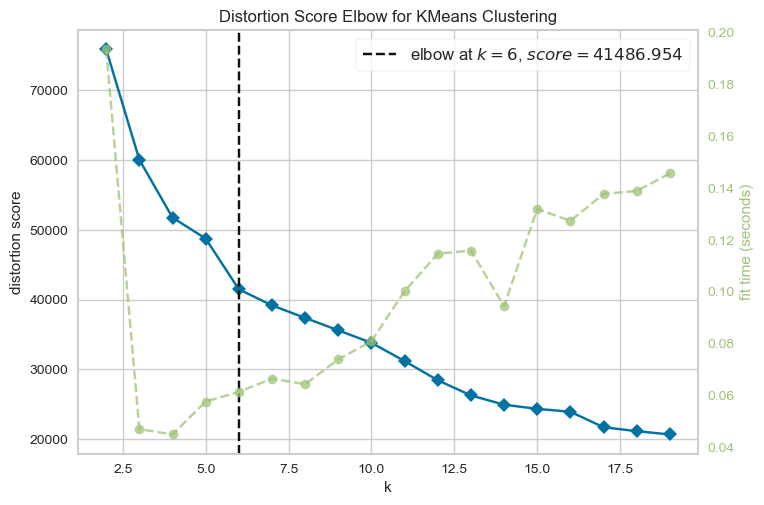

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
model = KMeans(random_state=136
               )
k=(2, 20)
color = 'green'

visualizer1 = KElbowVisualizer(model, k=k, color=color)
visualizer1.fit(scaled_data)
visualizer1.show()

**Final Model for KM**

In [17]:
kmclust = KMeans(n_clusters = 6, random_state=155)
km_labels = kmclust.fit_predict(scaled_data)

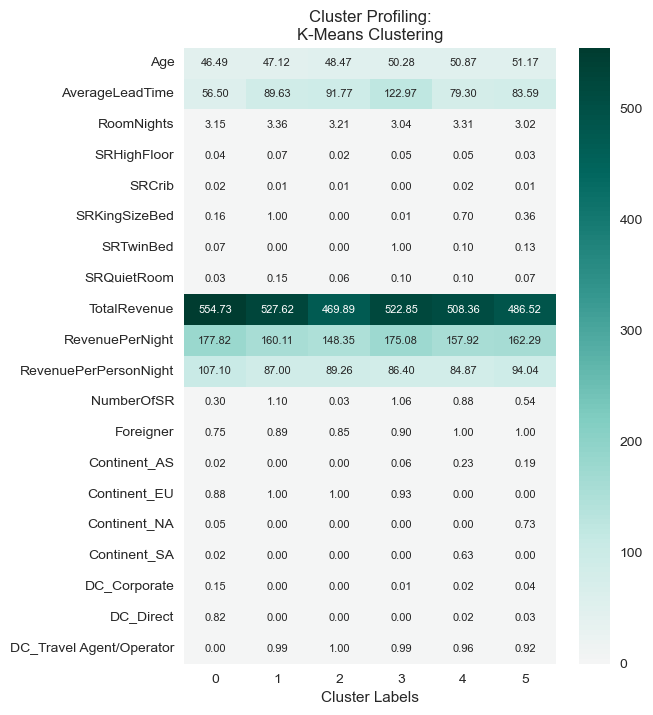

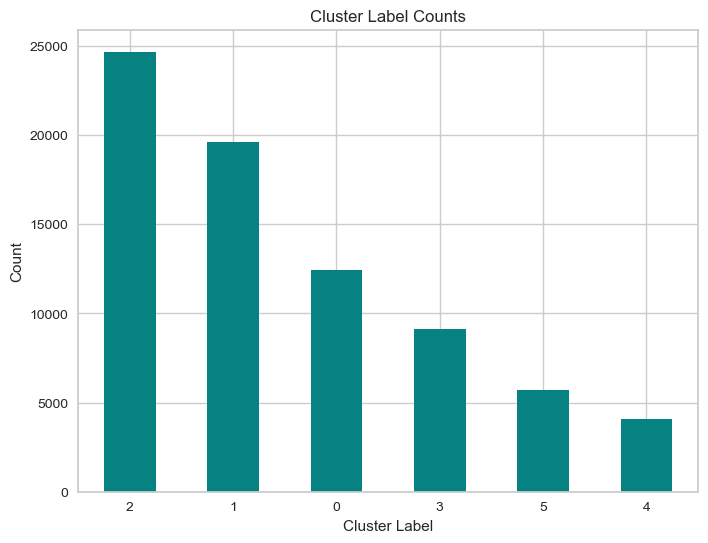

In [18]:
f.plot_cluster_profiling(df, km_labels, "K-Means", annot_size = 8)
f.plot_counts(km_labels)

**UMAP Visualisation**

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


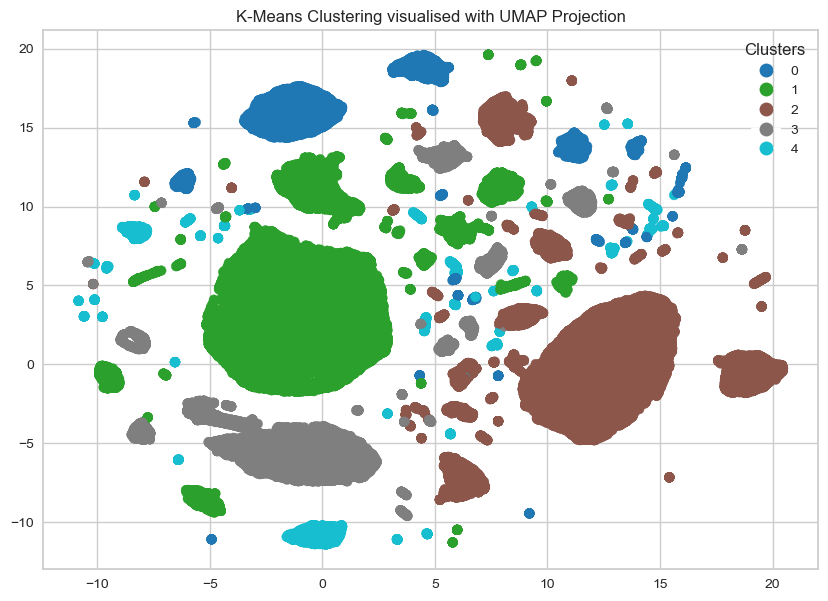

In [21]:
umap_object = umap.UMAP(n_neighbors = 10)
umap_embedding = umap_object.fit_transform(scaled_data)

f.plot_dim_reduction(umap_embedding, targets = km_labels,
                   technique = 'K-Means Clustering visualised with UMAP')

## 2.2 DBSCAN

<a href="#top">Top &#129033;</a>

**K-distance graph**

In [38]:
neigh = NearestNeighbors(n_neighbors=50)
neigh.fit(scaled_data)
distances, _ = neigh.kneighbors(scaled_data)
distances = np.sort(distances[:, -1])

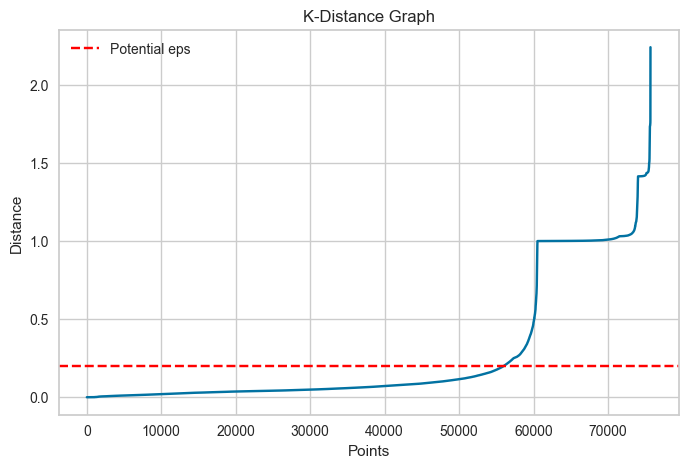

In [45]:
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.axhline(y=0.20, color='red', linestyle='--', label='Potential eps')
plt.xlabel("Points")
plt.ylabel("Distance")
plt.title("K-Distance Graph")
plt.legend()
plt.show()

**Final Model for DBSCAN**

In [ ]:
# Perform DBSCAN clustering
eps_value = 1.5
dbscan = DBSCAN(eps=eps_value, min_samples=200)
dbscan_labels = dbscan.fit_predict(scaled_data)

In [61]:
# Number of estimated clusters
n_clusters = len(np.unique(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"Number of estimated clusters: {n_clusters}")

Number of estimated clusters: 1


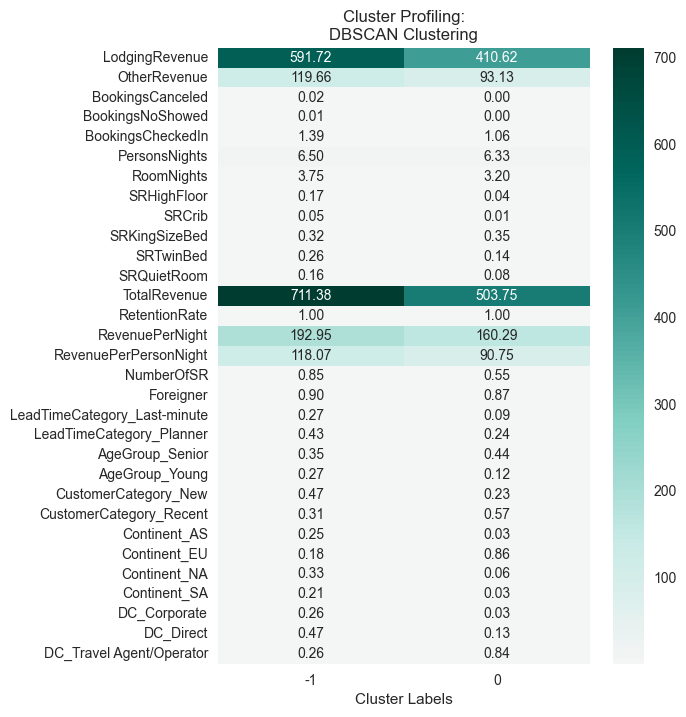

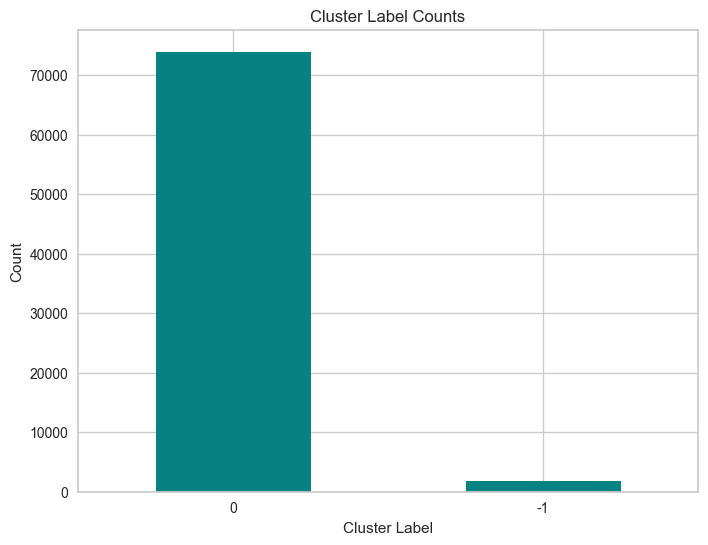

In [58]:
# Profiling and visualization
f.plot_cluster_profiling(df, dbscan_labels, "DBSCAN")
f.plot_counts(dbscan_labels)

**UMAP Visualisation**

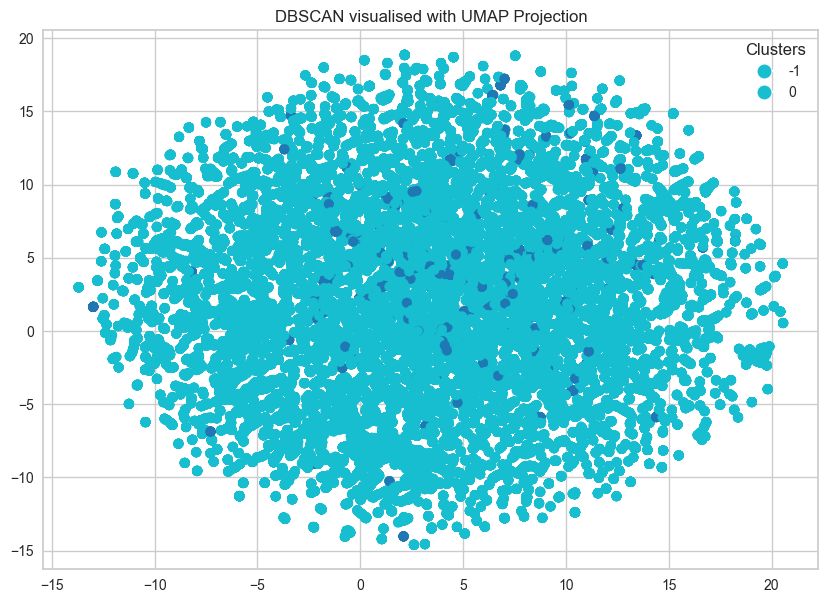

In [59]:
umap_object = umap.UMAP(n_neighbors=5)
umap_embedding = umap_object.fit_transform(scaled_data)

f.plot_dim_reduction(umap_embedding, targets=dbscan_labels, technique='DBSCAN visualised with UMAP')

As DBSCAN identifies *noise* with a -1 label, bellow we can inspect how many observations were identified as such.

In [62]:
outliers = df[dbscan_labels == -1]
print(f"Number of detected outliers: {len(outliers)}")

Number of detected outliers: 11


# 3. Clustering with Dimensionality Reduction

<a href="#top">Top &#129033;</a>

## 3.1 Principal Components Analysis

**Explained Variance vs Number of Components**

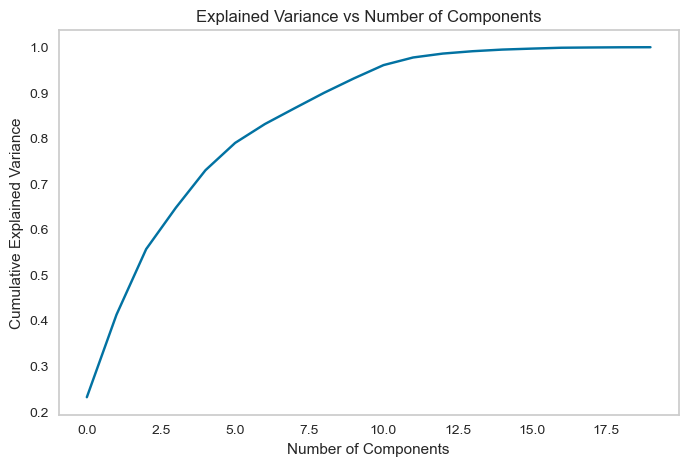

In [22]:
pca_full = PCA()
pca_full.fit(scaled_data)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)


plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.title('Explained Variance vs Number of Components')
plt.show()

In [23]:
# Create DataFrame with all PCs
pcaDF = pd.DataFrame({
    'Component': range(1, len(pca_full.explained_variance_ratio_) + 1),
    'Variance explained': pca_full.explained_variance_ratio_,
    'Cumulative variance explained': np.cumsum(pca_full.explained_variance_ratio_)
})

pcaDF

Component  Variance explained  Cumulative variance explained
0           1            0.230959                       0.230959
1           2            0.181367                       0.412326
2           3            0.144059                       0.556384
3           4            0.090904                       0.647288
4           5            0.082513                       0.729801
5           6            0.059998                       0.789800
6           7            0.041322                       0.831122
7           8            0.034686                       0.865808
8           9            0.034121                       0.899929
9          10            0.031470                       0.931399
10         11            0.029266                       0.960666
11         12            0.016815                       0.977481
12         13            0.008556                       0.986037
13         14            0.005169                       0.991206
14         15            0.003590                       0.994796
15         16            0.002154                       0.996950
16         17            0.001920                       0.998869
17         18            0.000553                       0.999423
18         19            0.000435                       0.999857
19         20            0.000143                       1.000000

**2 PCs**

In [24]:
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(scaled_data)

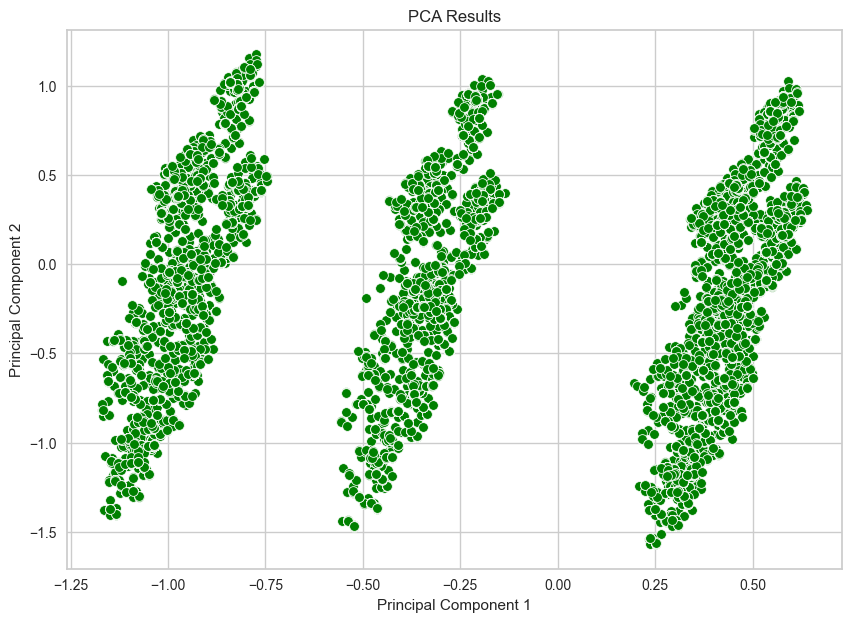

In [ ]:
X_pca_df2 = pd.DataFrame(X_pca2, columns=['PC1', 'PC2'])

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', data=X_pca_df2, color='green')
plt.title('PCA Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


**3 PCs**

In [23]:
pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(scaled_data)
X_pca_df3 = pd.DataFrame(X_pca3, columns=['PC1', 'PC2', 'PC3'])

# Interactive 3D Plot
fig = px.scatter_3d(X_pca_df3, x='PC1', y='PC2', z='PC3', color=X_pca_df3.index,  
                    title='Interactive 3D PCA Plot', color_continuous_scale='Greens', opacity=0.8)

fig.update_traces(marker=dict(size=7, line=dict(width=1, color='darkgreen')))
fig.update_layout(scene=dict(xaxis_title='PC1', yaxis_title='PC2', zaxis_title='PC3'))

fig.show()

***N* PCs**

In [28]:
pca12 = PCA(n_components=12)
X_pca12 = pca12.fit_transform(scaled_data)

**Explained Variance Ratio by Principal Component**

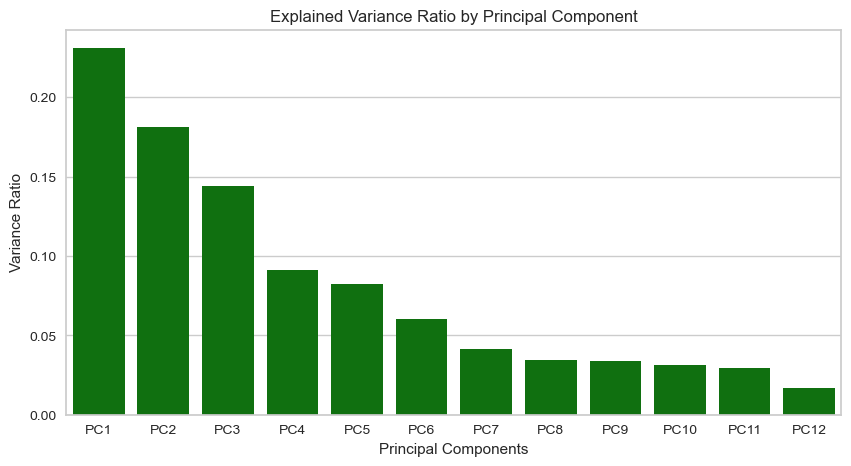

In [29]:
explained_variance = pca12.explained_variance_ratio_

plt.figure(figsize=(10, 5))
sns.barplot(x=[f'PC{i+1}' for i in range(len(explained_variance))], y=explained_variance, color='green')
plt.title('Explained Variance Ratio by Principal Component')
plt.xlabel('Principal Components')
plt.ylabel('Variance Ratio')
plt.show()


If a column has high absolute values in a component, that feature strongly influences that component.
We can determine which features contribute most to variance in the data.

In [30]:
# Create a dataframe with the weights per component
weights_df = pd.DataFrame(pca12.components_,columns=df.columns)
weights_df.T

0         1         2         3         4   \
Age                       0.010566 -0.035587 -0.047780  0.011025  0.004520   
AverageLeadTime           0.031052 -0.062569 -0.005459  0.073083  0.056040   
RoomNights                0.003690  0.002335 -0.000670  0.005816  0.015398   
SRHighFloor               0.033179  0.031241 -0.000978  0.103831 -0.023849   
SRCrib                    0.001587  0.013073 -0.001197  0.005620 -0.002899   
SRKingSizeBed             0.678300  0.601636  0.090503  0.259620 -0.124778   
SRTwinBed                -0.111536 -0.394444 -0.162929  0.767228 -0.359673   
SRQuietRoom               0.092678  0.006279  0.016988  0.179814  0.085408   
TotalRevenue             -0.000382  0.006605 -0.005034  0.018350  0.017363   
RevenuePerNight          -0.004553  0.005603 -0.005288  0.017385  0.003584   
RevenuePerPersonNight    -0.009235  0.007416 -0.001846 -0.000712  0.004300   
NumberOfSR                0.151078  0.065593 -0.018869  0.289932 -0.127981   
Foreigner                 0.129090 -0.077181 -0.314609  0.284302  0.867778   
Continent_AS              0.014593  0.003683 -0.182490 -0.046696 -0.046485   
Continent_EU             -0.073400 -0.097428  0.808312  0.200859  0.209833   
Continent_NA              0.023481  0.056691 -0.376737 -0.086127 -0.112998   
Continent_SA              0.028171  0.023193 -0.175668 -0.048030 -0.041934   
DC_Corporate             -0.071359  0.040204  0.014130 -0.060369 -0.079516   
DC_Direct                -0.437778  0.449213 -0.048365  0.222754  0.082737   
DC_Travel Agent/Operator  0.522881 -0.499019  0.035610 -0.155805 -0.012635   

                                5         6         7         8         9   \
Age                       0.005501  0.244303 -0.455583  0.564195  0.344539   
AverageLeadTime          -0.035700  0.156430 -0.247988  0.206472  0.117959   
RoomNights                0.001483 -0.001842  0.001455  0.008570  0.008516   
SRHighFloor               0.050918 -0.060679  0.067695 -0.454613  0.840263   
SRCrib                   -0.002374 -0.011619  0.006820 -0.034610 -0.005185   
SRKingSizeBed            -0.118566  0.001303  0.015613  0.091489 -0.097999   
SRTwinBed                -0.105557 -0.019553  0.047437  0.061141 -0.116489   
SRQuietRoom               0.971421  0.027800  0.022522  0.049126 -0.056063   
TotalRevenue              0.008671 -0.002130  0.000894 -0.004131 -0.000766   
RevenuePerNight           0.008327 -0.002377  0.002869 -0.016106 -0.011453   
RevenuePerPersonNight     0.010486 -0.005990  0.026129 -0.004096 -0.009824   
NumberOfSR               -0.039096 -0.023917  0.033850 -0.089759  0.166887   
Foreigner                -0.139167 -0.022541  0.135324  0.039898  0.006200   
Continent_AS              0.034862 -0.455949  0.051554 -0.103279 -0.133030   
Continent_EU             -0.066719  0.157335  0.053658 -0.003191 -0.000518   
Continent_NA              0.009760  0.726806  0.192056 -0.147648 -0.035164   
Continent_SA              0.016737 -0.376023 -0.266149  0.240459  0.165089   
DC_Corporate              0.001406 -0.069345  0.603558  0.450898  0.196488   
DC_Direct                 0.005690  0.037326 -0.390694 -0.239414 -0.122114   
DC_Travel Agent/Operator -0.002918  0.035449 -0.270150 -0.236052 -0.084237   

                                10        11  
Age                       0.352864 -0.405740  
AverageLeadTime           0.155522  0.903146  
RoomNights               -0.005143  0.025200  
SRHighFloor               0.053244  0.009393  
SRCrib                   -0.022156  0.024891  
SRKingSizeBed             0.016413 -0.006692  
SRTwinBed                -0.031366 -0.045658  
SRQuietRoom              -0.016007  0.016072  
TotalRevenue             -0.006101  0.027307  
RevenuePerNight          -0.003428 -0.001916  
RevenuePerPersonNight     0.002747 -0.026265  
NumberOfSR                0.004251 -0.005186  
Foreigner                -0.019373 -0.060073  
Continent_AS              0.670309  0.016237  
Continent_EU             -0.001232 -0.051272  
Co

## 3.2 K-Means

<a href="#top">Top &#129033;</a>

**Elbow Method**

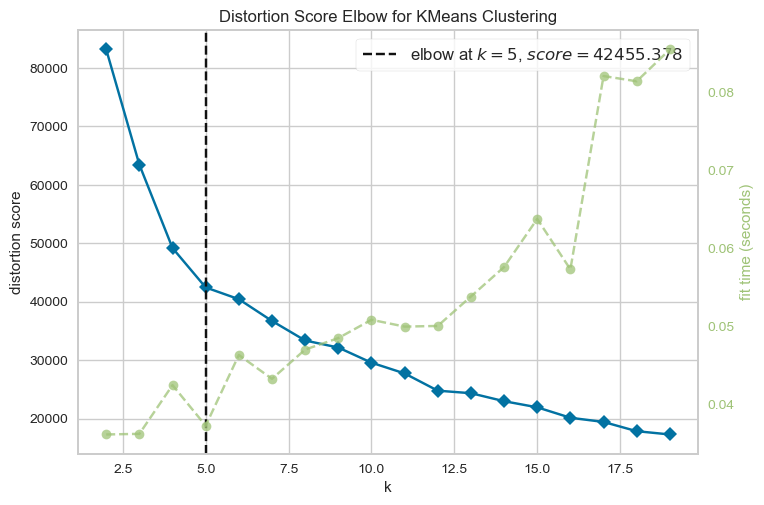

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
model = KMeans(random_state=61)
k=(2, 20)
color = 'green'

visualizer1 = KElbowVisualizer(model, k=k, color=color)
visualizer1.fit(X_pca12)
visualizer1.show()

**Final Model for K-Means on PCA**

In [64]:
kmeans = KMeans(n_clusters = 6, random_state=2)
allDistances = kmeans.fit_transform(X_pca12)
km_labels = kmeans.fit_predict(X_pca12)

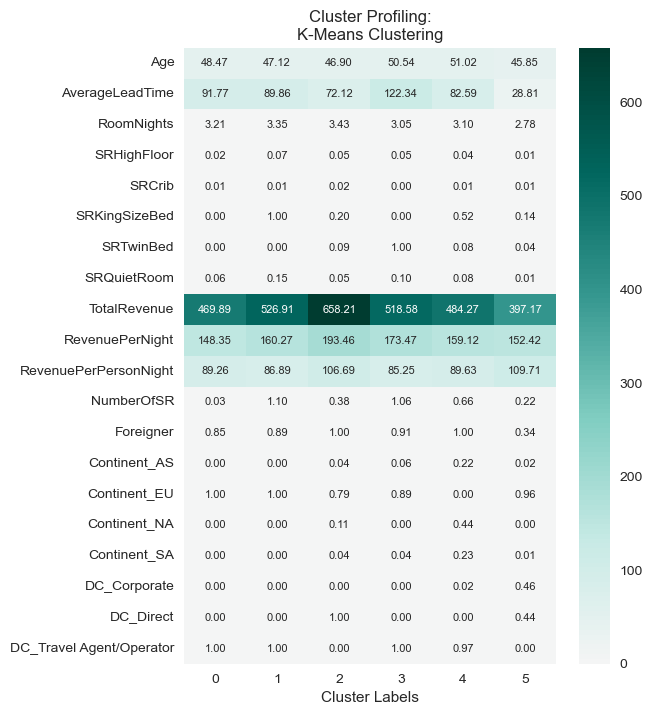

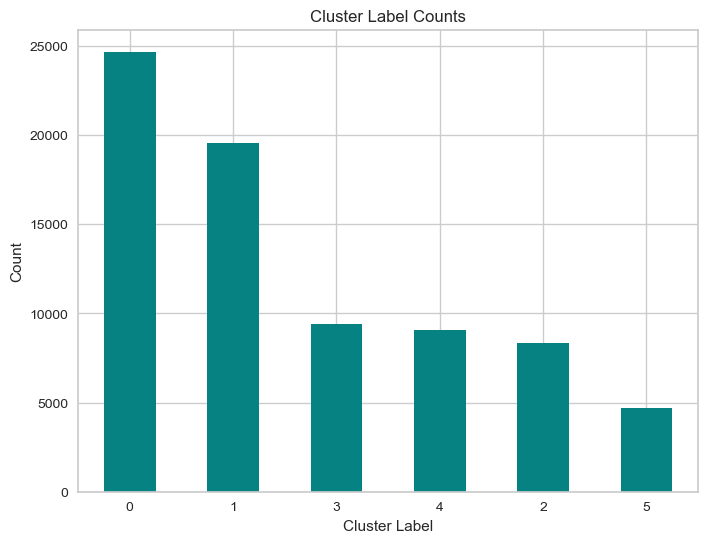

In [65]:
# Profiling and visualization
f.plot_cluster_profiling(df, km_labels, "K-Means", annot_size = 8)
f.plot_counts(km_labels)

**UMAP Visualisation**

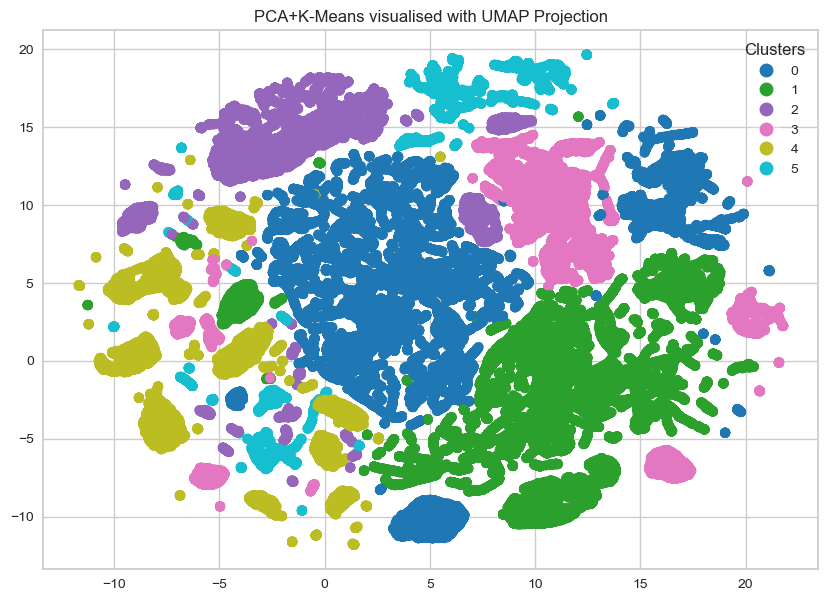

In [68]:
umap_object = umap.UMAP(n_neighbors = 10)
umap_embedding = umap_object.fit_transform(X_pca12)

f.plot_dim_reduction(umap_embedding, 
                     targets=km_labels, 
                     technique='PCA+K-Means visualised with UMAP')

## 3.3 DBSCAN

<a href="#top">Top &#129033;</a>

In [69]:
# K-distance graph to determine the optimal eps value
neigh = NearestNeighbors(n_neighbors=50)
neigh.fit(X_pca12)
distances, _ = neigh.kneighbors(X_pca12)
distances = np.sort(distances[:, -1])

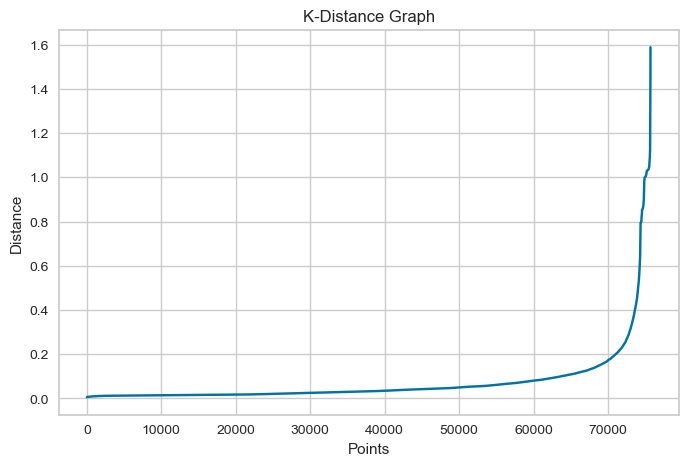

In [70]:
plt.figure(figsize=(8, 5))
plt.plot(distances)
#plt.axhline(y=1.25, color='red', linestyle='--', label='Potential eps')
plt.xlabel("Points")
plt.ylabel("Distance")
plt.title("K-Distance Graph")
plt.legend()
plt.show()

**Final Model for DBSCAN on PCA**

In [72]:
# eps_value = 0.05
dbscan = DBSCAN()
dbscan_labels = dbscan.fit_predict(X_pca12)

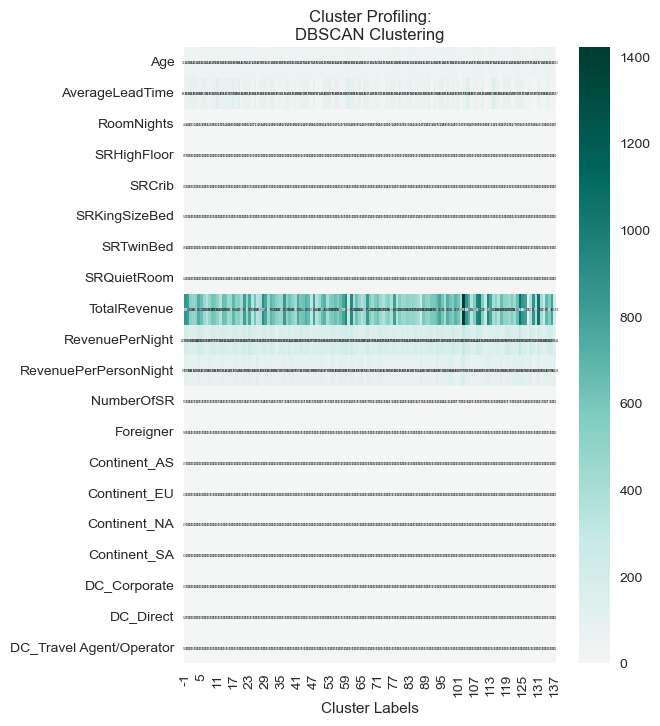

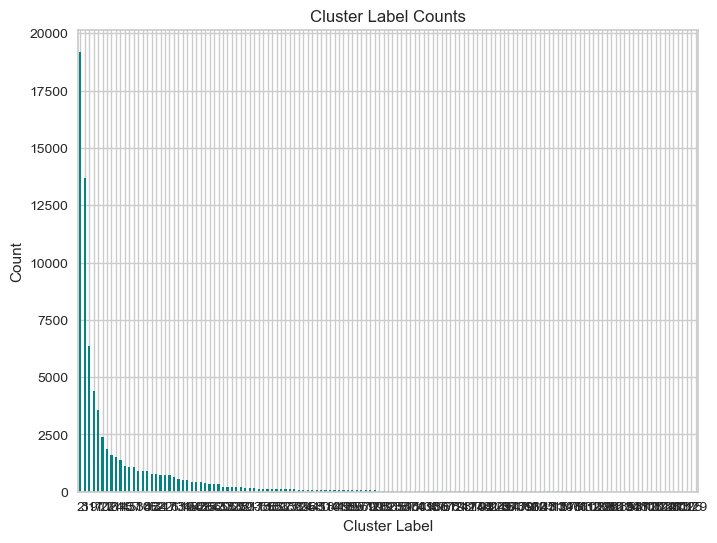

In [73]:
# Profiling and visualization
f.plot_cluster_profiling(df, dbscan_labels, "DBSCAN", annot_size = 2)
f.plot_counts(dbscan_labels)

**UMAP Visualisation**

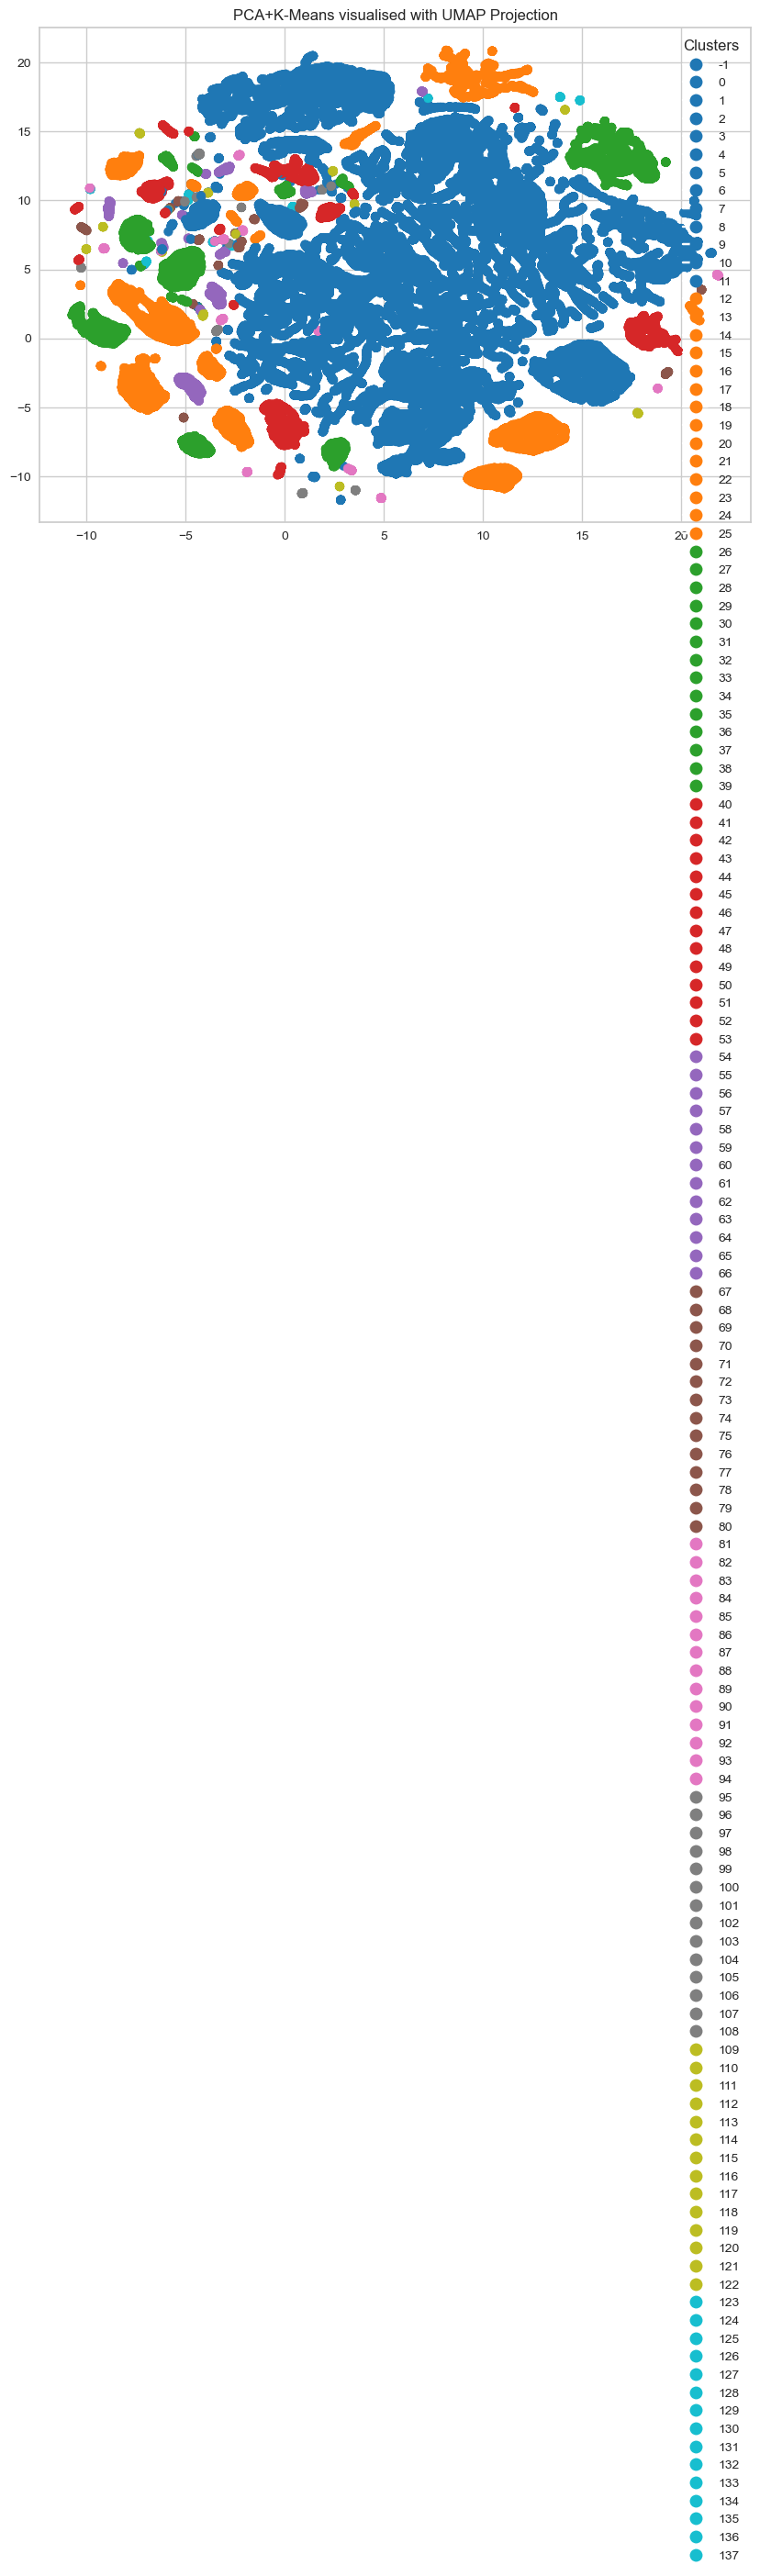

In [74]:
umap_object = umap.UMAP(n_neighbors = 10)
umap_embedding = umap_object.fit_transform(X_pca12)

f.plot_dim_reduction(umap_embedding, 
                     targets=dbscan_labels, 
                     technique='PCA+K-Means visualised with UMAP')

# 4. Cluster Evaluation

<a href="#top">Top &#129033;</a>

### Quality of clustering

Before proceeding with further analysis, we need to validate that our clusters align with our expectations. This involves two key steps:  

1. **Visual Inspection:** we need to check whether the clusters make intuitive sense. Do examples that we consider similar fall into the same cluster? If not, we may need to reconsider our clustering approach or features, for instance.


2. **Quantitative Metrics:** we will evaluate our cluster quality using two metrics: 
- Cluster cardinality: Cluster cardinality refers to the number of examples in each cluster. Very large or very small clusters might indicate issues, like one cluster capturing mostly noise.

- Cluster magnitude: Measures the spread of a cluster, measured by the total distance of all points to the cluster center. Clusters with very high magnitude may contain more dispersed data points.


After deeply exploring several clustering solutions, we chose as a final one using PCA with 12 PCs and K-Means with 6 clusters on top. The exploration of the final solution can be found bellow.

In [101]:
df['KMeans_labels'] = km_labels

**Inter Cluster Distance**

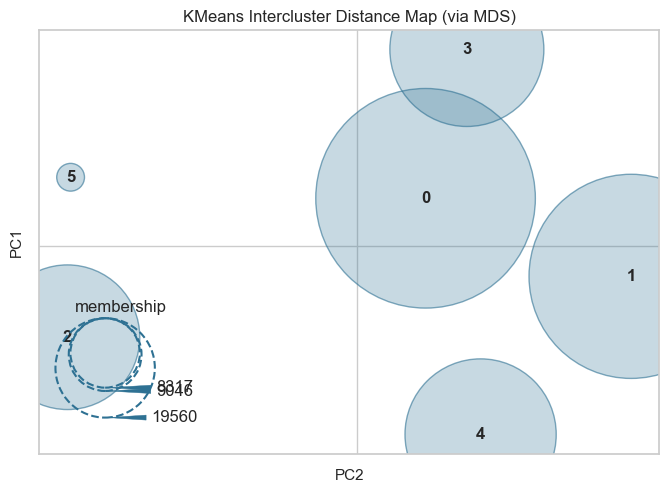

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [75]:
# Visualizing the clusters sizes and distances in 2D
visualizer = InterclusterDistance(kmeans)
visualizer.fit(X_pca12)
visualizer.show()

**Silhouette**

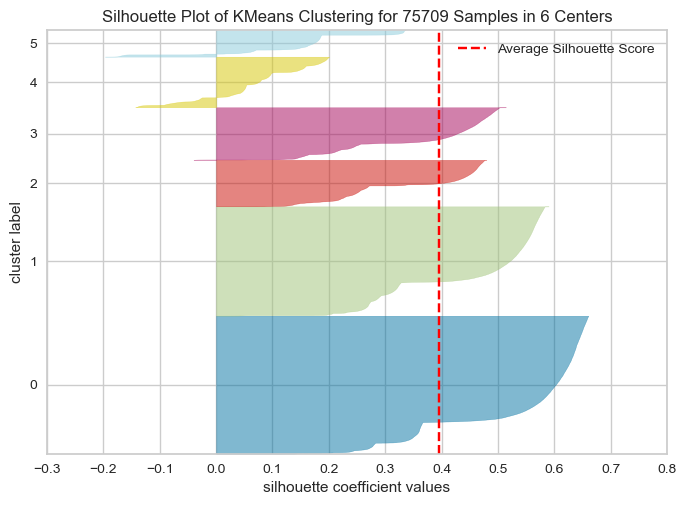

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 75709 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [76]:
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X_pca12)
visualizer.show()

**Cluster Cardinality**

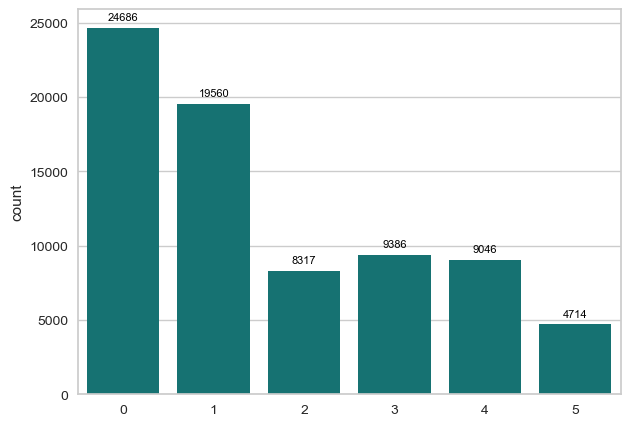

In [90]:
freqByCluster = df.groupby(km_labels).size()
# Draw figure
fig, ax = plt.subplots(figsize=(7, 5))

# Plot the cluster cardinality
sns.countplot(x=km_labels, color=f.main_color, ax=ax)

for index, data in enumerate(freqByCluster):
    ax.text(x=index, y=data + 500, s=f"{data}", fontsize=8, 
            color="black", ha="center")

**Cluster Magnitude**

In [93]:
subPlots_Title_fontSize = 12
subPlots_xAxis_fontSize = 10
subPlots_yAxis_fontSize = 10
subPlots_label_fontSize = 10
heatmaps_text_fontSize = 8

plots_Title_fontSize = 14
plots_Title_textColour = 'black'

plots_Legend_fontSize = 12
plots_Legend_textColour = 'black'

plots_barTexts_fontSize = 8

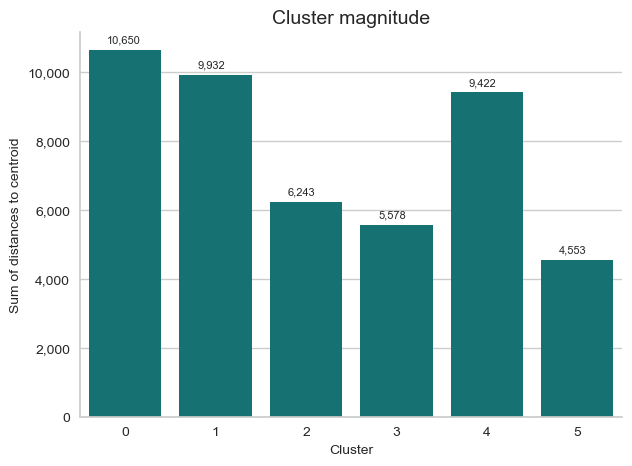

In [97]:
# Plot clusters magnitude

# Compute Magnitude
scaled_data['distanceToCentroid'] = np.min(allDistances,axis=1)
magnitude = scaled_data['distanceToCentroid'].groupby(km_labels).sum()
scaled_data = scaled_data.drop(columns=['distanceToCentroid'])

# Draw
fig, ax = plt.subplots(figsize=(7,5))
g = sns.barplot(x=magnitude.index, y=magnitude.values, color=f.main_color)

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
for index,data in enumerate(magnitude):
    plt.text(x=index-0.2 , y=data+200 , s=f"{data:,.0f}" , fontdict=dict(fontsize=plots_barTexts_fontSize))
sns.despine()
plt.title("Cluster magnitude", fontsize=plots_Title_fontSize)
plt.xlabel("Cluster")
plt.ylabel("Sum of distances to centroid")
plt.rc('axes', labelsize=subPlots_label_fontSize)

**Magnitude versus cardinality**

The Cardinality vs Magnitude plot compares cluster cardinality with cluster magnitude. Clusters with a higher cardinality tend to also have a higher cluster magnitude. Using this graph, we can identify anomalous clusters by looking for ones that are not very close to the 45-degree line.

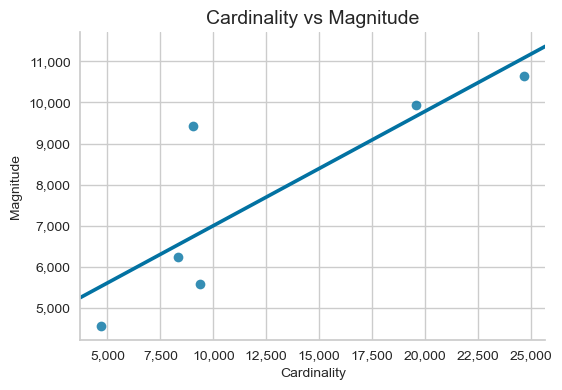

In [106]:
# Draw
fig, ax = plt.subplots(figsize=(6,4))
g = sns.regplot(x=freqByCluster, y=magnitude, scatter=True, seed=123,truncate=False, ci=None)

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)
ax.yaxis.set_major_formatter(tick)
sns.despine()
plt.title("Cardinality vs Magnitude", fontsize=plots_Title_fontSize)
plt.xlabel("Cardinality")
plt.ylabel("Magnitude")
plt.rc('axes', labelsize=subPlots_label_fontSize)

# 5. Outliers' Reintroduction

<a href="#top">Top &#129033;</a>

As outliers were seperated from the rest of the data before, we will now proceed to label them using a Machine Learning model.

In [109]:
df

Age  AverageLeadTime  RoomNights  SRHighFloor  SRCrib  SRKingSizeBed  \
0       60.0             64.0         3.0            0       0              1   
1       54.0             14.0         5.0            1       0              1   
4       53.0             56.0         1.0            0       0              0   
6       33.0              2.0         3.0            0       0              0   
7       31.0            179.0         2.0            0       0              1   
...      ...              ...         ...          ...     ...            ...   
107621  22.0             69.0         2.0            0       0              0   
107622  54.0             83.0         3.0            0       0              0   
107624  41.0             58.0         2.0            0       0              0   
107625  19.0             89.0         7.0            0       0              1   
107627  60.0            176.0         4.0            0       0              0   

        SRTwinBed  SRQuietRoom  TotalRevenue  RevenuePerNight  \
0               0            1         657.0       219.000000   
1               0            0         795.0       159.000000   
4               0            0         177.0       177.000000   
6               0            0         308.6       102.866667   
7               0            0         234.0       117.000000   
...           ...          ...           ...              ...   
107621          1            0         244.0       122.000000   
107622          1            0         330.9       110.300000   
107624          0            0         232.0       116.000000   
107625          0            0         942.7       134.671429   
107627          0            0         826.8       206.700000   

        RevenuePerPersonNight  NumberOfSR  Foreigner  Continent_AS  \
0                  109.500000           1          1             0   
1                   79.500000           2          1             0   
4                   59.000000           0          1             0   
6                  102.866667           0          1             0   
7                  117.000000           1          1             0   
...                       ...         ...        ...           ...   
107621              61.000000           1          1             0   
107622              55.150000           1          1             0   
107624             116.000000           0          1             0   
107625              67.335714           1          1             0   
107627              68.900000           0          1             0   

        Continent_EU  Continent_NA  Continent_SA  DC_Corporate  DC_Direct  \
0                  1             0             0             0          1   
1                  1             0             0             0          0   
4                  1             0             0             0          0   
6                  1             0             0             0          0   
7                  1             0             0             0          0   
...              ...           ...           ...           ...        ...   
107621             0             1             0             0          0   
107622             0             1             0             0          0   
107624             0             1             0             0          1   
107625             1             0             0             0          0   
107627             1             0             0             0          0   

        DC_Travel Agent/Operator  KMeans_labels  
0                              0              2  
1                              1              1  
4                              1              0  
6                              1              0  
7                              1              1  
...                          ...            ...  
107621                         1              4  
107622                         1              4  
107624                         0       

**Splitting the data into train and testing and fitting a model**

In [120]:
X = df.drop('KMeans_labels', axis = 1)
y = df['KMeans_labels']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fitting the decision tree
rf = RandomForestClassifier(random_state=42, max_depth=3)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=42)

**Predictions**

In [121]:
# Predictions for training and test sets
y_train_pred = rf.predict(X_train)  
y_test_pred = rf.predict(X_test)   

# F1 scores
f1_train = f1_score(y_train, y_train_pred, average='weighted')  
f1_test = f1_score(y_test, y_test_pred, average='weighted')     

# Print F1 scores
print("Training F1 Score: {:.2f}".format(f1_train))
print("Test F1 Score: {:.2f}".format(f1_test))

# Classification reports
print("\nClassification Report (Training):")
print(classification_report(y_train, y_train_pred))
print(' ')

print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred))

Training F1 Score: 0.95
Test F1 Score: 0.95

Classification Report (Training):
              precision    recall  f1-score   support

           0       0.93      1.00      0.97     19788
           1       0.97      1.00      0.99     15576
           2       0.85      1.00      0.92      6604
           3       0.99      1.00      0.99      7562
           4       1.00      0.81      0.90      7255
           5       1.00      0.55      0.71      3782

    accuracy                           0.95     60567
   macro avg       0.96      0.89      0.91     60567
weighted avg       0.95      0.95      0.95     60567

 

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      4898
           1       0.98      1.00      0.99      3984
           2       0.86      1.00      0.92      1713
           3       0.99      0.99      0.99      1824
           4       1.00      0.81      0.90      1791
           5       1

**Feature Importances**

In [122]:
# Assessing feature importance
pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

SRKingSizeBed               0.210189
NumberOfSR                  0.197694
DC_Travel Agent/Operator    0.170490
SRTwinBed                   0.137784
Continent_EU                0.119185
DC_Direct                   0.074045
Continent_NA                0.029389
Continent_SA                0.014369
DC_Corporate                0.014184
Foreigner                   0.013601
Continent_AS                0.008062
RevenuePerNight             0.003089
AverageLeadTime             0.002483
RoomNights                  0.001988
TotalRevenue                0.001178
RevenuePerPersonNight       0.000966
Age                         0.000669
SRQuietRoom                 0.000482
SRCrib                      0.000106
SRHighFloor                 0.000048
dtype: float64

**Outlier Predictions**

In [125]:
outliers['KMeans_labels'] = rf.predict(outliers[df.drop([ 
               'KMeans_labels'] , axis = 1).columns])
outliers.head()

Age  DaysSinceCreation  AverageLeadTime  LodgingRevenue  OtherRevenue  \
0  24.0              949.0              7.0          9682.4        1300.0   
1  74.0              187.0            197.0           336.0         136.5   
2  56.0              277.0              1.0           390.0        3190.4   
3  41.0             1295.0              6.0          3910.0         433.5   
4  72.0              720.0            574.0           468.0         157.1   

   BookingsCanceled  BookingsNoShowed  BookingsCheckedIn  PersonsNights  \
0               0.0               0.0                1.0           12.0   
1               0.0               0.0               15.0           28.0   
2               0.0               0.0                1.0            5.0   
3               2.0               1.0               38.0           42.0   
4               0.0               0.0                1.0           12.0   

   RoomNights  SRHighFloor  SRCrib  SRKingSizeBed  SRTwinBed  SRQuietRoom  \
0         6.0            0       0              0          0            0   
1        28.0            0       0              1          0            0   
2         5.0            0       0              0          0            1   
3        42.0            0       0              0          0            0   
4         6.0            0       0              0          0            0   

   TotalRevenue  RetentionRate  RevenuePerNight  RevenuePerPersonNight  \
0       10982.4       1.000000      1830.400000             915.200000   
1         472.5       1.000000        16.875000              16.875000   
2        3580.4       1.000000       716.080000             716.080000   
3        4343.5       0.926829       103.416667             103.416667   
4         625.1       1.000000       104.183333              52.091667   

   NumberOfSR  Foreigner  LeadTimeCategory_Last-minute  \
0           0          1                           0.0   
1           1          0                           0.0   
2           0          1                           1.0   
3           0          0                           0.0   
4           0          1                           0.0   

   LeadTimeCategory_Planner  AgeGroup_Senior  AgeGroup_Young  \
0                       1.0              0.0             1.0   
1                       0.0              1.0             0.0   
2                       0.0              1.0             0.0   
3                       1.0              0.0             0.0   
4                       0.0              1.0             0.0   

   CustomerCategory_New  CustomerCategory_Recent  Continent_AS  Continent_EU  \
0                   0.0                      1.0             0             0   
1                   1.0                      0.0             0             1   
2                   1.0                      0.0             0             0   
3                   0.0                      0.0             0             1   
4                   0.0                      1.0             0             0   

   Continent_NA  Continent_SA  DC_Corporate  DC_Direct  \
0             1             0             0          0   
1             0             0             0          0   
2             1             0             0          1   
3             0             0             1          0   
4             0             0             0          0   

   DC_Travel Agent/Operator  FlagOutlier  KMeans_labels  
0                         1            1              4  
1                         1            1              1  
2                         0            1              2  
3                         0            1              5  
4                         1            1              0

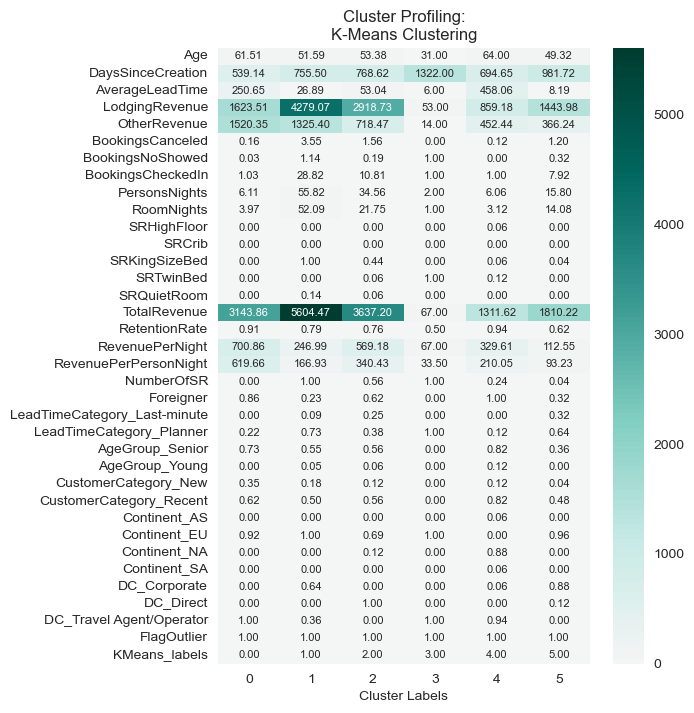

In [138]:
f.plot_cluster_profiling(outliers, 
                         outliers['KMeans_labels'], 
                         "K-Means", annot_size = 8)

In [126]:
# outliers.to_csv('./outliers_with_labels.csv')